## 1. Data for home-age-price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("1-house-price-train.csv")
df1

,area,room,age,price
0,2600,3.0,20,550
1,3000,4.0,15,565
2,3200,NaN,18,610
3,3600,3.0,30,595
4,4000,5.0,8,760


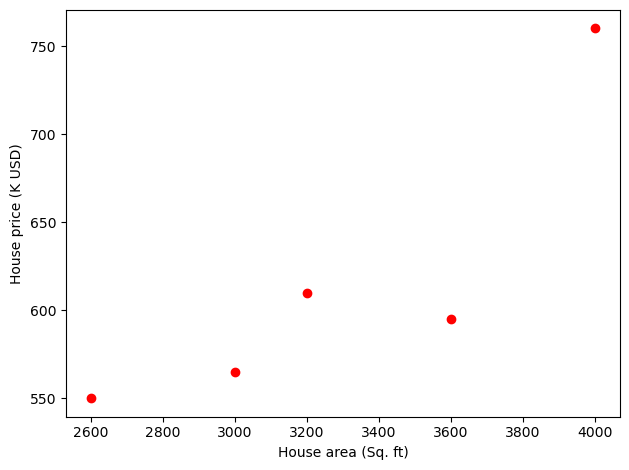

In [3]:
plt.xlabel("House area (Sq. ft)")
plt.ylabel("House price (K USD)")
plt.scatter(df1.area, df1.price, color="red")
plt.tight_layout()
plt.show()

## 2. Simple linear regression

In [4]:
# price = w*area + b --> y = w * x + b
# price is `dependent variable`, area is `independent variables (features)`
# w is coefficient, and b is the intercept

from sklearn.linear_model import LinearRegression

model_single = LinearRegression()
model_single.fit(df1[["area"]], df1.price)

LinearRegression()

In [5]:
model_single.score(df1[["area"]], df1.price)

0.745338964506105

In [6]:
print("Coefficient is ", model_single.coef_, " and intercept is ", model_single.intercept_)

Coefficient is  [0.13407534]  and intercept is  176.23287671232868


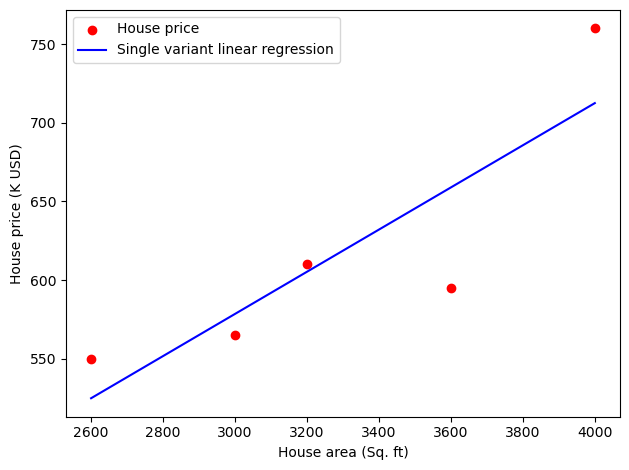

In [7]:
plt.xlabel("House area (Sq. ft)")
plt.ylabel("House price (K USD)")

plt.scatter(df1.area, df1.price, color="red", label="House price")
prediction_single = df1.area*model_single.coef_[0] + model_single.intercept_
plt.plot(df1.area, prediction_single, color="b", label="Single variant linear regression")

plt.legend(loc="upper left")
plt.tight_layout()

plt.show()

## 3. Multiple linear regression

In [8]:
# price = w1*area + w2*room + w3*age + b --> y = w1*x1 + w2*x2 + w3*x3 + b
# w1, w2, and w3 are coefficients, and b is the intercept

In [9]:
# 1st we should handle NA value
import math
median_room = math.floor(df1.room.median())
median_room

3

In [10]:
df1.room.fillna(median_room) 
df1.room = df1.room.fillna(median_room)
df1

,area,room,age,price
0,2600,3.0,20,550
1,3000,4.0,15,565
2,3200,3.0,18,610
3,3600,3.0,30,595
4,4000,5.0,8,760


In [11]:
# create model and then fit
model_multiple = LinearRegression()
model_multiple.fit(df1[["area", "room", "age"]].values, df1.price)

LinearRegression()

In [12]:
# evaluation
model_multiple.score(df1[["area", "room", "age"]].values, df1.price)

0.9488817891373802

In [13]:
print("Coefficients are: ", model_multiple.coef_, " and intercept is ", model_multiple.intercept_)
# print("w1 = %8.4f\nw2 = %8.4f\nw3 = %8.4f" % (model.coef_[0], model.coef_[1], model.coef_[2]))
print(f"w1 = {model_multiple.coef_[0]:8.4f}")
print(f"w2 = {model_multiple.coef_[1]:8.4f}")
print(f"w3 = {model_multiple.coef_[2]:8.4f}")

Coefficients are:  [  0.13725 -26.025    -6.825  ]  and intercept is  383.7249999999999
w1 =   0.1373
w2 = -26.0250
w3 =  -6.8250


In [14]:
target = 3000, 4, 40
price = model_multiple.predict(np.array([target]))[0]
print(f"The price for a house with {target[0]} sq ft, {target[1]} room, and {target[2]} years old is {price:6.2f} K USD.")

The price for a house with 3000 sq ft, 4 room, and 40 years old is 418.38 K USD.


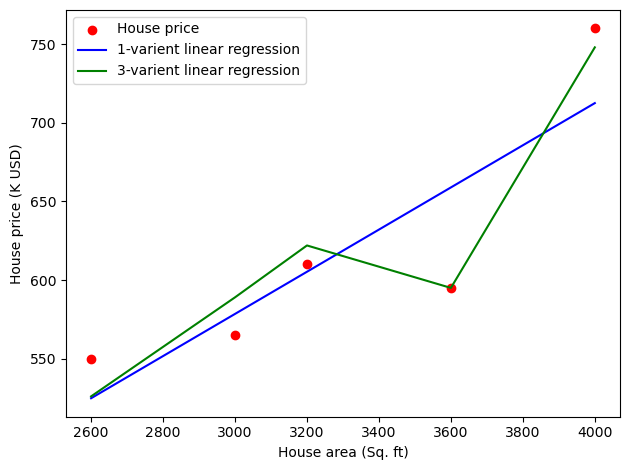

In [15]:
plt.xlabel("House area (Sq. ft)")
plt.ylabel("House price (K USD)")

plt.scatter(df1.area, df1.price, color="red", label="House price")

prediction_single = df1.area*model_single.coef_[0] + model_single.intercept_
plt.plot(df1.area, prediction_single, color="b", label="1-varient linear regression")

prediction_multiple = model_multiple.predict(df1[["area", "room", "age"]].values)
plt.plot(df1.area, prediction_multiple, color="g", label="3-varient linear regression")

plt.legend(loc="upper left")
plt.tight_layout()

plt.savefig("./1-house-price-multivarient-linear-regression.png")

## 4. Polynomial regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures

### 4.1 Quadratic regression

In [17]:
quadratic_featurizer = PolynomialFeatures(degree=2)
x_train_2nd = quadratic_featurizer.fit_transform(df1[["area"]])
y_train = df1.price

In [18]:
model_2nd = LinearRegression()
model_2nd.fit(x_train_2nd, y_train)

# better than single and worse than multivarient linear regression
model_2nd.score(x_train_2nd, y_train)

0.8766650936887879

### 4.2 Cubic regression

In [19]:
quadratic_featurizer = PolynomialFeatures(degree=3)
x_train_3rd = quadratic_featurizer.fit_transform(df1[["area"]])
y_train = df1.price
model_3rd = LinearRegression()
model_3rd.fit(x_train_3rd, y_train)

# better than single and worse than multivarient linear regression
model_3rd.score(x_train_3rd, y_train)

0.9550709895555879

### 4.2 7th regression

In [20]:
quadratic_featurizer = PolynomialFeatures(degree=7)
x_train_7th = quadratic_featurizer.fit_transform(df1[["area"]])
y_train = df1.price
model_7th = LinearRegression()
model_7th.fit(x_train_7th, y_train)

# better than single and worse than multivarient linear regression
model_7th.score(x_train_7th, y_train)

0.9999999995285302

## 5. All plots

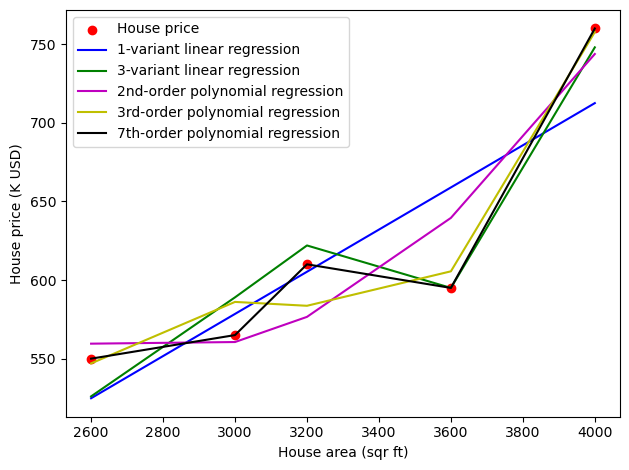

In [21]:
plt.xlabel("House area (sqr ft)")
plt.ylabel("House price (K USD)")

plt.scatter(df1.area, df1.price, color="red", label="House price")

prediction_single = df1.area*model_single.coef_[0] + model_single.intercept_
plt.plot(df1.area, prediction_single, color="b", label="1-variant linear regression")

prediction_multiple = model_multiple.predict(df1[["area", "room", "age"]].values)
plt.plot(df1.area, prediction_multiple, color="g", label="3-variant linear regression")

prediction_2nd = model_2nd.predict(x_train_2nd)
plt.plot(df1.area, prediction_2nd, color="m", label="2nd-order polynomial regression")

prediction_3rd = model_3rd.predict(x_train_3rd)
plt.plot(df1.area, prediction_3rd, color="y", label="3rd-order polynomial regression")

prediction_7th = model_7th.predict(x_train_7th)
plt.plot(df1.area, prediction_7th, color="k", label="7th-order polynomial regression")

plt.legend(loc="upper left")
plt.tight_layout()

plt.savefig("./1-house-price-polynomial-regression.png")